# Predicting Customer Churn Using ML

**About Dataset**

This Global Customer Churn Dataset is meticulously curated to aid in understanding and predicting customer churn Behaviour across various industries. With detailed customer profiles, including demographics, product interactions, and banking behaviors, this dataset is an invaluable resource for developing machine learning models aimed at identifying at-risk customers and devising targeted retention strategies."

**Data Description:**

Break down the dataset in detail, describing what each column represents:

**RowNumber:** A unique identifier for each row in the dataset.

**CustomerId:** Unique customer identification number.

**Surname:** The last name of the customer (for privacy reasons, consider anonymizing this data if not already done).

**CreditScore:** The customer's credit score at the time of data collection.

**Geography:** The customer's country or region, providing insights into location-based trends in churn.

**Gender:** The customer's gender.

**Age:** The customer's age, valuable for demographic analysis.

**Tenure:** The number of years the customer has been with the bank.

**Balance:** The customer's account balance.

**NumOfProducts:** The number of products the customer has purchased or subscribed to.

**HasCrCard:** Indicates whether the customer has a credit card (1) or not (0).

**IsActiveMember:** Indicates whether the customer is an active member (1) or not (0).

**EstimatedSalary:** The customer's estimated salary.

**Exited:** The target variable, indicating whether the customer has churned (1) or not (0).

This dataset is primed for exploratory data analysis, customer segmentation, predictive modeling to churn behaviour,
and the development of customer retention strategies. It offers rich insights for business strategists, data scientists, and researchers interested in improving customer loyalty and reducing churn rates.

Dataset Link: https://www.kaggle.com/datasets/anandshaw2001/customer-churn-dataset/data


## Loading Required Library

In [1]:
import os
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import FeatureUnion

In [2]:
#Dataloader Class
class DatasetLoader:
    def __init__(self, file_path):
        self.file_path = file_path
    def load_csv(self):
        try:
            dataframe = pd.read_csv(self.file_path)
            return dataframe
        except FileNotFoundError:
            print(f"File '{self.file_path}' not found.")
            return None
        except Exception as e:
            print(f"An error occurred while loading the dataset: {str(e)}")
            return None



In [3]:
def main():
    # Define the file path of the CSV dataset
    file_path = "Dataset/Churn_Modelling.csv"
    
    # Create an instance of DatasetLoader
    loader = DatasetLoader(file_path)
    
    # Load the CSV dataset
    dataset = loader.load_csv()
    dataset.describe()
    
    # Check if the dataset was successfully loaded
    if dataset is not None:
        print("Dataset loaded successfully.")
        #print(dataset.head())  # Display the first few rows of the dataset
        print(dataset.describe())
    else:
        print("Failed to load the dataset.")

if __name__ == "__main__":
    main()

Dataset loaded successfully.
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797

In [4]:
dataset_churn = pd.read_csv("Dataset/Churn_Modelling.csv")
dataset_churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
dataset_churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


With the following information of the dataset, we have some interesting findings. Though we can see here among 14 columns 11 of them is numeric and only 3 of the columns are object (String). Interesting fact is though 11 columns are numeric `Tenure`, `NumOfProducts`, `HasCrCard`, `isActiveMember` and the target column `Exited` is categorical so only 6 of them are non-categorical. These findings are very important while we will do Data Preprocessing

In [6]:
columns_to_omit = [0,1,2,4,5,10,13]
columns_to_keep = [col for col in range(len(dataset_churn.columns)) if col not in columns_to_omit]
data_filtered = dataset_churn.iloc[:, columns_to_keep]
data_filtered.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000


Basically here certain columns which is unnecessary and also which has binary outcome and string based those has been omitted to have better analysis of the dataset. <br>
In the perspective of outcome: The dataset contains information on 10,000 bank customers, including their credit scores, ages, tenure with the bank, account balances, number of products held, activity status, and estimated salaries. On average, customers have a credit score of 650.53, are around 38.92 years old, and have been with the bank for approximately 5.01 years. The average account balance is 76,485.89, with a standard deviation of 62,397.41. Most customers (51.51%) are active members. The estimated salary of customers ranges from 11.58 to 199,992.48, with a median value of 100,193.92 <br>
and the most deviated column here is `Balance` approximately 62,397.41, indicating higher variability in account balances among customers.

# Data Exploration and Visualisation

## Understanding the distribution

At first we will look at the distribution of the dataset and try to figure out if the distribution is right or not

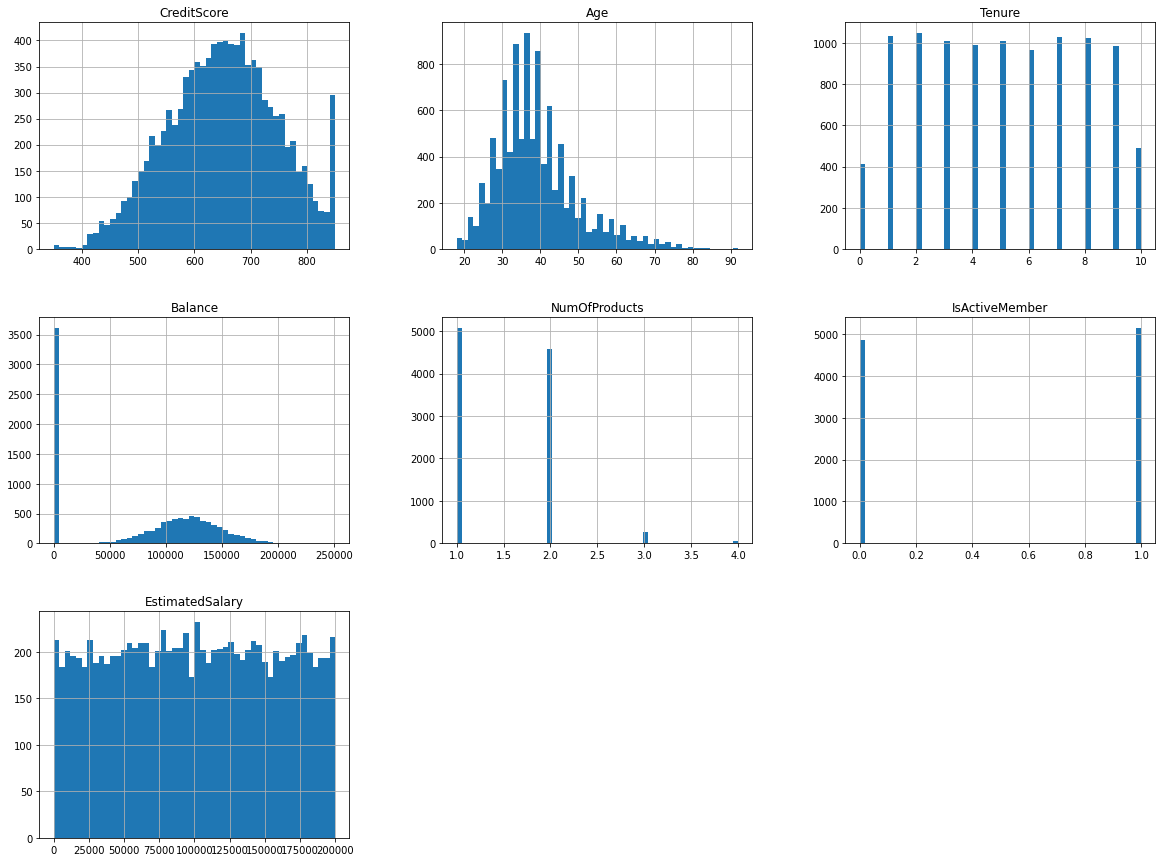

In [7]:
data_filtered.hist(bins=50, figsize=(20,15))
plt.show()

Here Estimated Salary is Uniform Distribution

From the above distribution we can understand that `CreditScore`, `Age` and `Balance` is normally distributed but among them `CreditScore` and `Age` is little bit skewed and `Balance` has outlier which is affecting the normal distribution. And here `Tenure`, `NumOfProducts` and `isActiveMember` act as more categorical than numeric distribution. And interestingly `EstimatedSalary` showing Uniform Distribution. <br>

So from this we can make decision of data preprocessing which will be effective before model creation. But before doing that we need more data on skewness so that we can fix that problem as well if data is highly skewed.<br>

**About Skewness**: <br>

* Positive skewness (skewness > 0): If the skewness value is positive, it indicates that the tail of the distribution is longer on the right side. In other words, the majority of the data points are concentrated on the left side of the distribution, and the distribution is said to be right-skewed or positively skewed.

* Negative skewness (skewness < 0): If the skewness value is negative, it indicates that the tail of the distribution is longer on the left side. In this case, the majority of the data points are concentrated on the right side of the distribution, and the distribution is considered left-skewed or negatively skewed.

Here's a simple guideline:<br>

**If skewness > 0: The distribution is right-skewed.**<br>
**If skewness < 0: The distribution is left-skewed.**


In [9]:
from scipy.stats import skew
# Calculate skewness

def calculate_skewness(dataset):
    skewness = skew(dataset)
    result = print("Skewness:", skewness)
    return result

In [10]:
calculate_skewness(data_filtered['CreditScore'])

Skewness: -0.07159586676212397


In [11]:
calculate_skewness(data_filtered['Age'])

Skewness: 1.0111685586628079


In [12]:
calculate_skewness(data_filtered['Balance'])

Skewness: -0.14108754375291138


Now Let's Analyze this: <br>

CreditScore: Skewness = -0.0716 <br>
Since the skewness is close to zero and negative, the distribution is almost symmetric with a slight left skew. This means that the tail of the distribution may be slightly longer on the left side, but overall, the distribution is relatively balanced. <br>

Age: Skewness = 1.0112 <br>
The skewness is positive, indicating a right skew. This means that the majority of the data points are concentrated on the lower end of the age range, and there may be a longer tail towards higher ages. <br>

Balance: Skewness = -0.1411 <br>
Similar to CreditScore, the skewness is close to zero and negative, indicating a slight left skew. The distribution of balances is almost symmetric, but there may be a slight tendency for more data points to be on the lower end of the balance range.


**We will do our data preprocessing step later in the Data PreProcessing Section"**

## Descriptive Analysis

Question 1: Is the higher salary people has higher score or not?

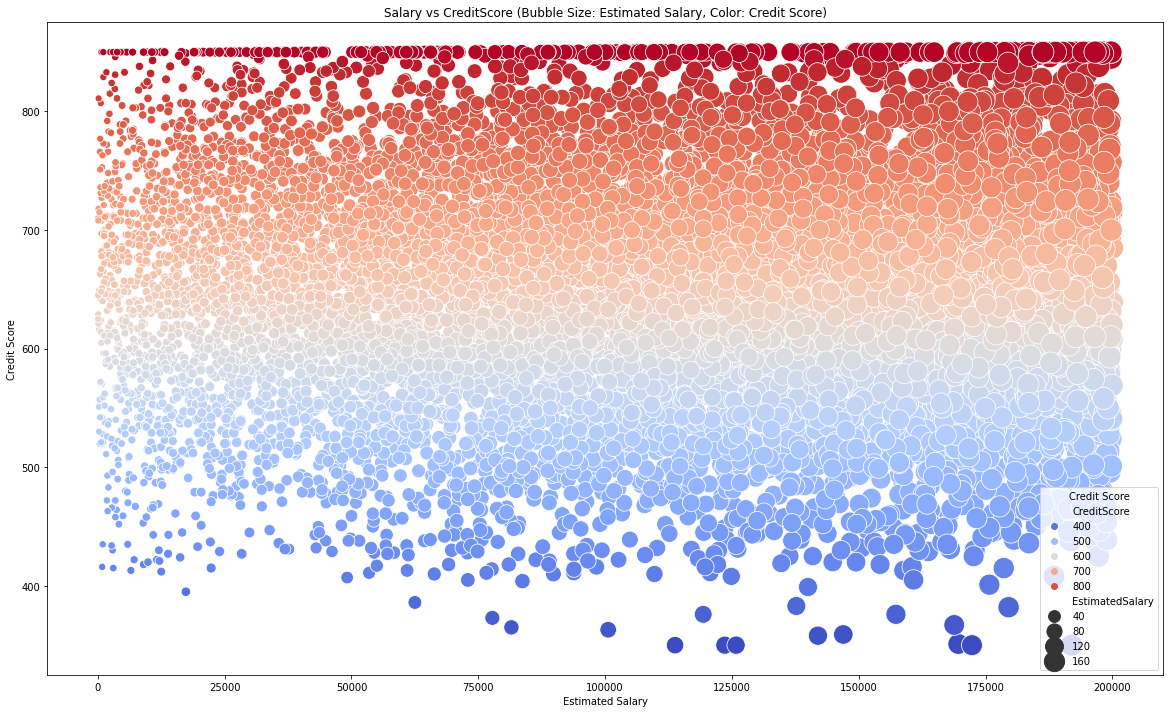

In [16]:
# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(20, 12))

# Define bubble sizes based on salary (larger bubbles for higher salary)
bubble_sizes = dataset_churn['EstimatedSalary'] / 1000

# Scatter plot with bubbles and different colors for credit scores
sns.scatterplot(data=dataset_churn, x='EstimatedSalary', y='CreditScore', hue='CreditScore', size=bubble_sizes, sizes=(50, 500), palette='coolwarm')

# Set title and labels
plt.title('Salary vs CreditScore (Bubble Size: Estimated Salary, Color: Credit Score)')
plt.xlabel('Estimated Salary')
plt.ylabel('Credit Score')

# Add legend
plt.legend(title='Credit Score')

# Show plot
plt.show()



In this visualisation we can see different credit score with estimated salary. But it doesn't show the actual picture so I have divided the credit score into 5 categories.

Poor Credit Score: 0 - 579 <br>
Fair Credit Score: 580 - 669 <br>
Good Credit Score: 670 - 739 <br> 
Very Good Credit Score: 740 - 799 <br>
Exceptional Credit Score: 800 - 850 <br>

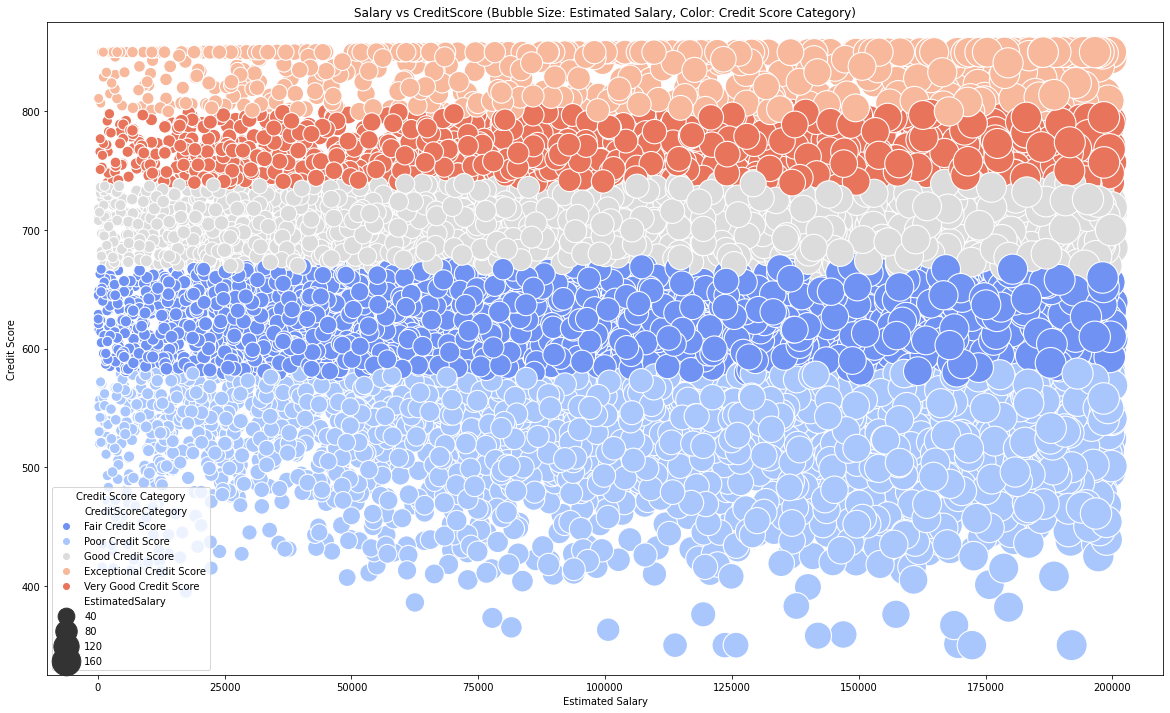

In [18]:
# Define a function to categorize credit scores
def categorize_credit_score(score):
    if score >= 0 and score <= 579:
        return 'Poor Credit Score'
    elif score >= 580 and score <= 669:
        return 'Fair Credit Score'
    elif score >= 670 and score <= 739:
        return 'Good Credit Score'
    elif score >= 740 and score <= 799:
        return 'Very Good Credit Score'
    elif score >= 800 and score <= 850:
        return 'Exceptional Credit Score'
    else:
        return 'Unknown'

# Apply the function to create a new column for credit score category
dataset_churn['CreditScoreCategory'] = dataset_churn['CreditScore'].apply(categorize_credit_score)

# Set up the plot
plt.figure(figsize=(20, 12))

# Scatter plot with bubbles and different colors for credit score categories
sns.scatterplot(data=dataset_churn, x='EstimatedSalary', y='CreditScore', hue='CreditScoreCategory', size=bubble_sizes, sizes=(100,1000), palette='coolwarm')

# Set title and labels
plt.title('Salary vs CreditScore (Bubble Size: Estimated Salary, Color: Credit Score Category)')
plt.xlabel('Estimated Salary')
plt.ylabel('Credit Score')

# Add legend
plt.legend(title='Credit Score Category')

# Show plot
plt.show()


So from this visualisation we can realise it's not manadatory that if you have lower salary your credit score will be lower but most of the median salary whose salary in between 50000 and 100000 has fair credit score mostly. But we can understand here credit score doesn't rely on salary.